# Part 1: Data Processing

In [1]:
print('Solution 2')
import pandas as pd
df=pd.read_csv('winequality-white.csv',sep=";") # since file is separated by ;
df.head()

Solution 2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
print('Solution 3')
import numpy as np

# Data Matrix
X = np.array(df.iloc[:,0:11])

# Target Vector
y = np.array((df["quality"]>5).astype(np.int))

print(X.shape)
print(y.shape)
print(y)
print(X)

Solution 3
(4898, 11)
(4898,)
[1 1 1 ... 1 1 1]
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [3]:
print('Solution 4')
df.describe()

Solution 4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
print('Solution 5-optional')

Solution 5-optional


Solution 6


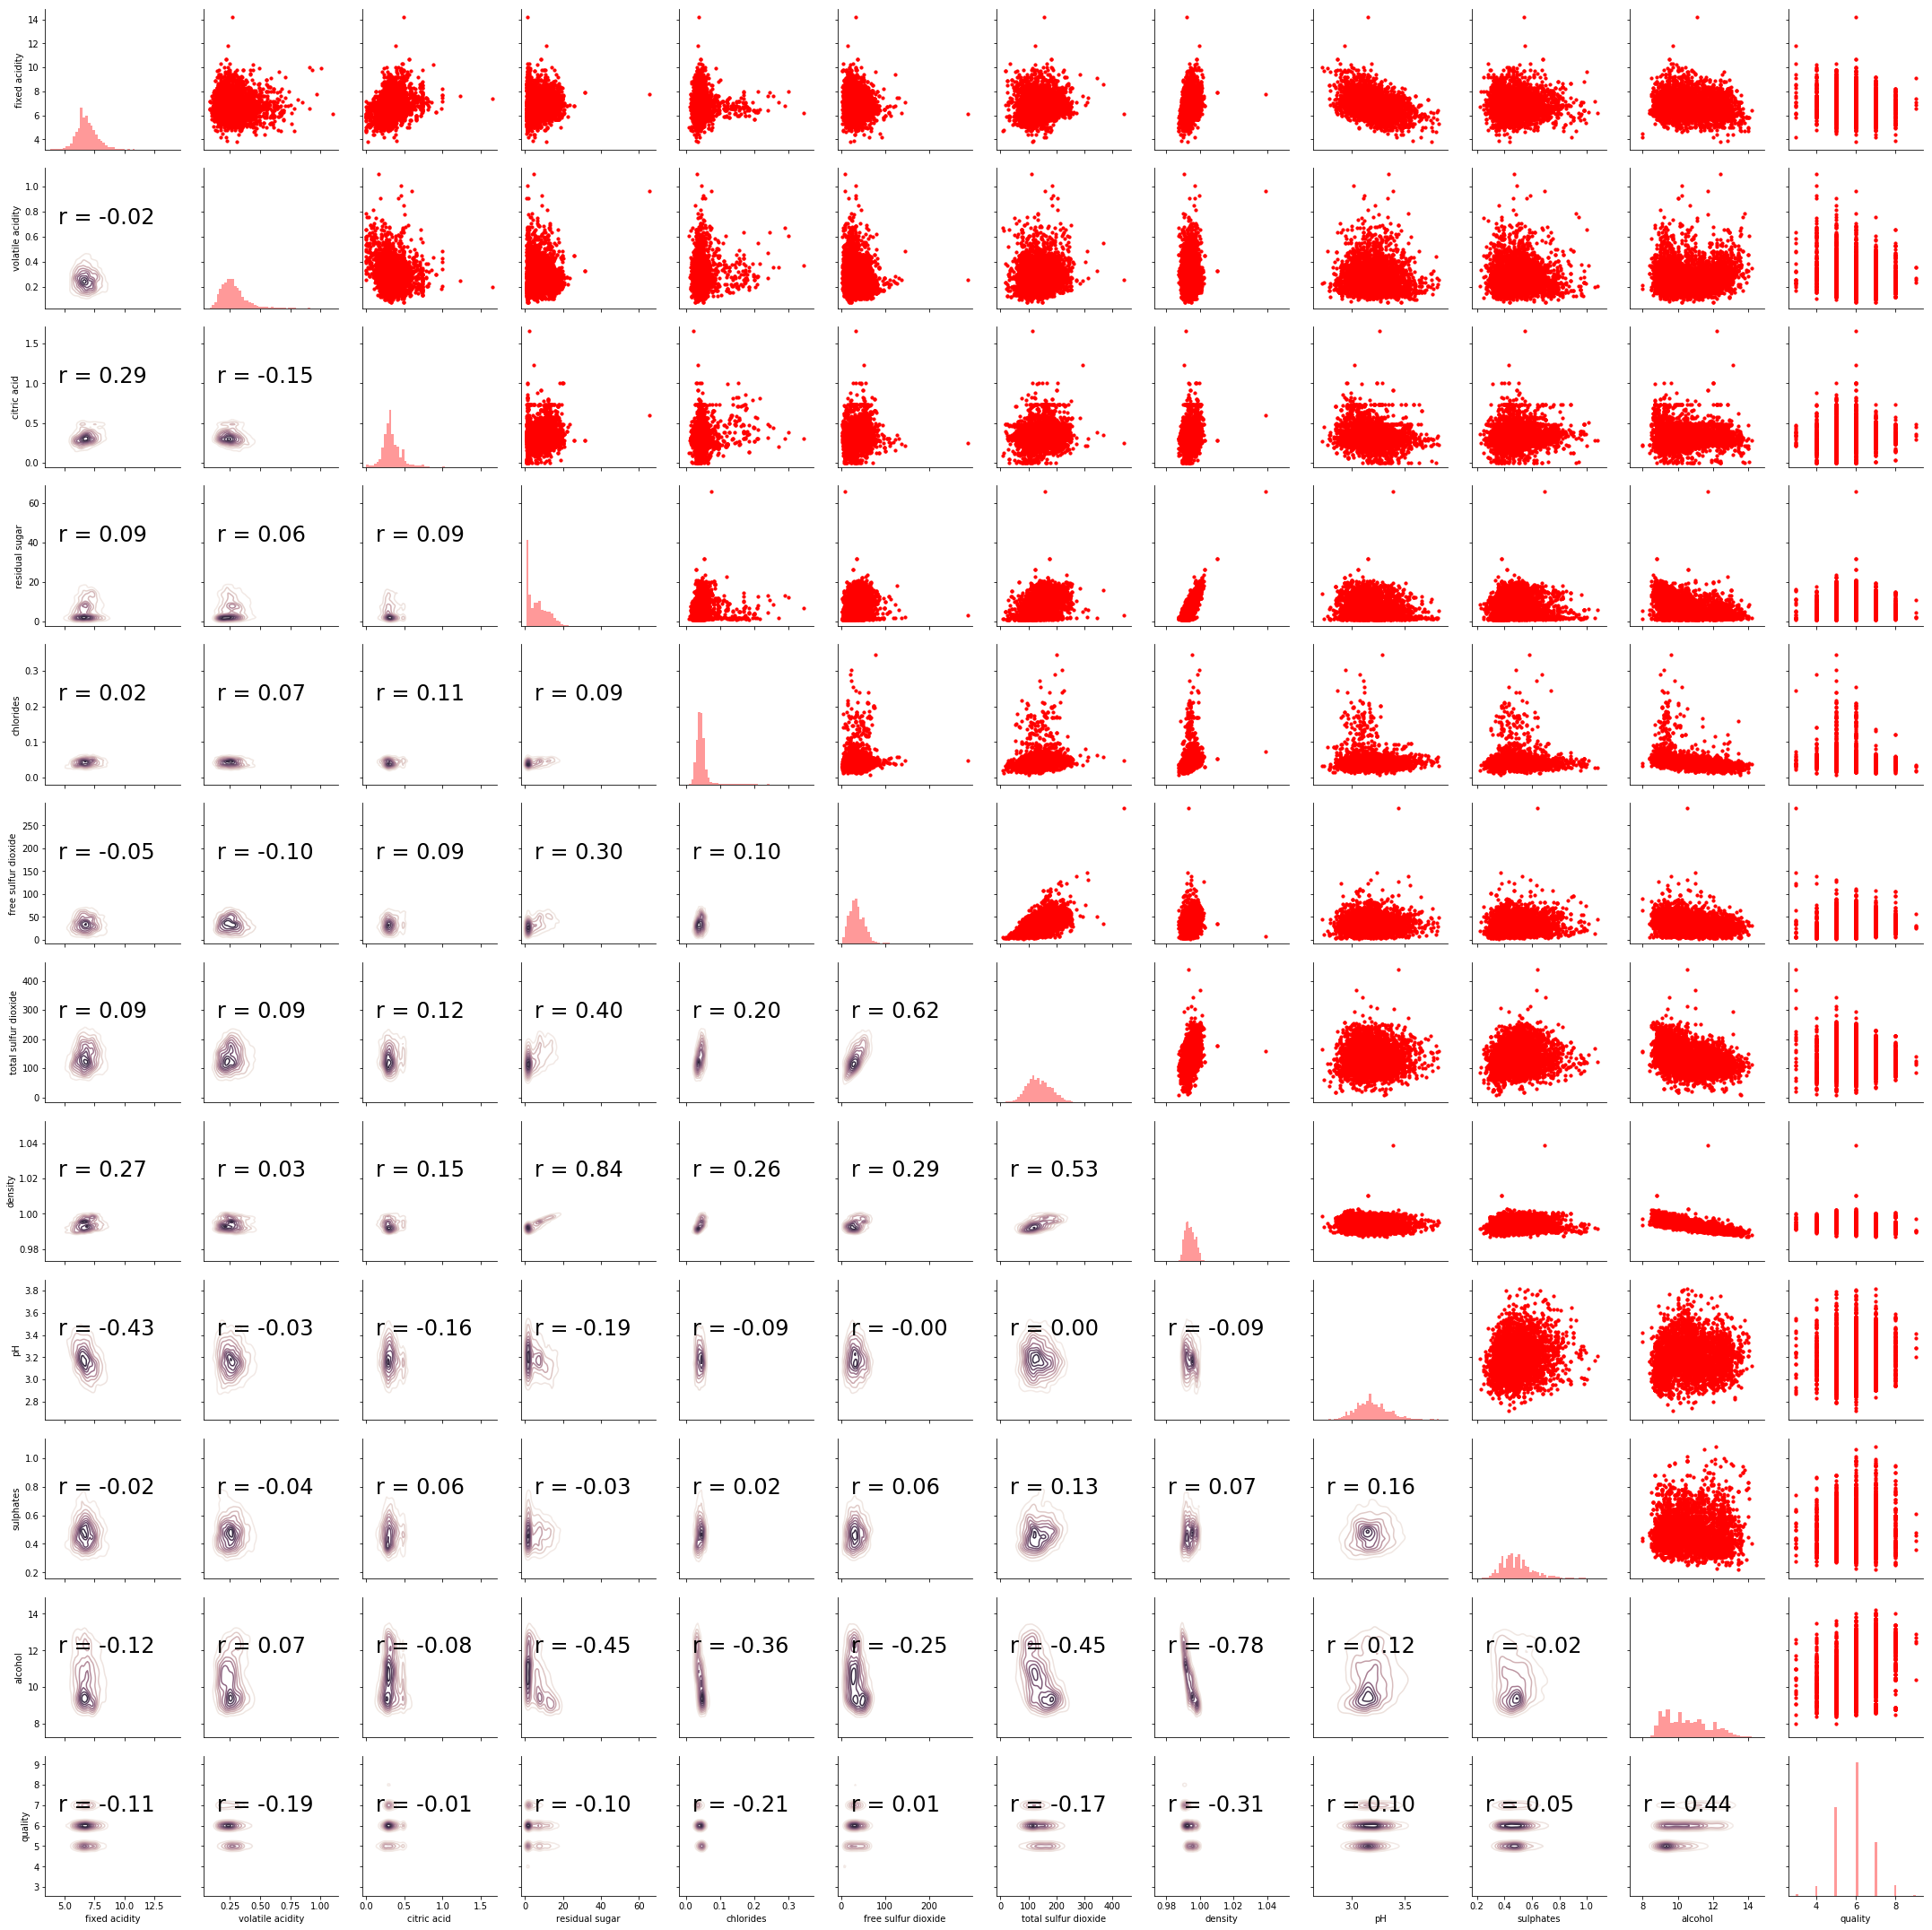

In [5]:
print('Solution 6')
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

### Solution 7: From the correlation we can find out that 'free sulfur dioxide' and 'citric acid' are highly correlated with less than 0.01 difference. 

In [6]:
df.corr().abs().unstack().sort_values().drop_duplicates()

pH                    free sulfur dioxide     0.000618
                      total sulfur dioxide    0.002321
free sulfur dioxide   quality                 0.008158
quality               citric acid             0.009209
chlorides             sulphates               0.016763
fixed acidity         sulphates               0.017143
alcohol               sulphates               0.017433
volatile acidity      fixed acidity           0.022697
chlorides             fixed acidity           0.023086
residual sugar        sulphates               0.026664
volatile acidity      density                 0.027114
pH                    volatile acidity        0.031915
volatile acidity      sulphates               0.035728
fixed acidity         free sulfur dioxide     0.049396
sulphates             quality                 0.053678
free sulfur dioxide   sulphates               0.059217
sulphates             citric acid             0.062331
volatile acidity      residual sugar          0.064286
alcohol   

In [7]:
#dropping alcohol from the dataframe
df=df.drop(labels='alcohol',axis=1)


In [8]:
df.head()
X = np.array(df.iloc[:,0:10])# this code takes all the columsn from uptil 10 excluding quality column as we dont want that in our 
print(X.shape)

(4898, 10)


In [9]:
print('Solution 8')
from sklearn.model_selection import train_test_split
# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

Solution 8


In [10]:
print('Solution 9')
from sklearn.preprocessing import scale
X_train = scale(X_train)
#y_test = scale(y_test)
#X_test
X_test = scale(X_test)
#y_train = scale(y_train)

print('Standardization does not work for y_test and y_train')

Solution 9
Standardization does not work for y_test and y_train


# Part 2: Model Evaluation

In [11]:
print('Solution 11')
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors =  [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37]

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


Solution 11


In [12]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
param_grid = {'n_neighbors':  [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37],
              'p': [1, 2, 10, 100],
              'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=10)
knn_cv.fit(X_train, y_train)

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

Best Score: 0.871948
Optimal Hyperparameter Values:  {'n_neighbors': 37, 'p': 1, 'weights': 'distance'}


In [13]:
print('Solution 11')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="distance", algorithm='auto', n_neighbors=37, p=1)
knn.fit(X_train, y_train) 

Solution 11


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=37, p=1,
           weights='distance')

In [14]:
print('Solution 12')
from sklearn.model_selection import cross_val_score

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=10)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Solution 12
[0.87188612 0.88566243 0.90744102 0.85304659 0.88602941 0.85923218
 0.856102   0.87179487 0.86535009 0.86281588]
Accuracy: 0.87 (+/- 0.03)


In [15]:
print('Solution 13')
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=10)


precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)



confusion_matrix(y_train, y_train_pred)

Solution 13
Precision = 0.824820
Recall = 0.924673
F1 Score = 0.871897


array([[ 805,  511],
       [ 196, 2406]])

Solution 14

FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.00151976 0.00151976 0.00227964 0.00227964 0.00227964
 0.00303951 0.00303951 0.00303951 0.00303951 0.00379939 0.00379939
 0.00455927 0.00455927 0.00455927 0.00455927 0.00531915 0.00531915
 0.00531915 0.00531915 0.00607903 0.00607903 0.00759878 0.00759878
 0.00835866 0.00835866 0.00911854 0.00911854 0.00911854 0.00911854
 0.0106383  0.0106383  0.01139818 0.01139818 0.01215805 0.01215805
 0.01367781 0.01367781 0.01519757 0.01519757 0.01595745 0.01595745
 0.01595745 0.01595745 0.01671733 0.01671733 0.0174772  0.0174772
 0.01823708 0.01823708 0.01823708 0.01823708 0.01899696 0.01899696
 0.01975684 0.01975684 0.02051672 0.02051672 0.0212766  0.0212766
 0.02203647 0.02203647 0.02279635 0.02279635 0.02355623 0.02355623
 0.02431611 0.02431611 0.02507599 0.02507599 0.02583587 0.02583587
 0.02659574 0.02659574 0.0281155  0.0281155  0.0281155  0.0281155
 0.02887538 0.02887538 0.02963526 0.02963526 0.03039514 0.03039514
 0

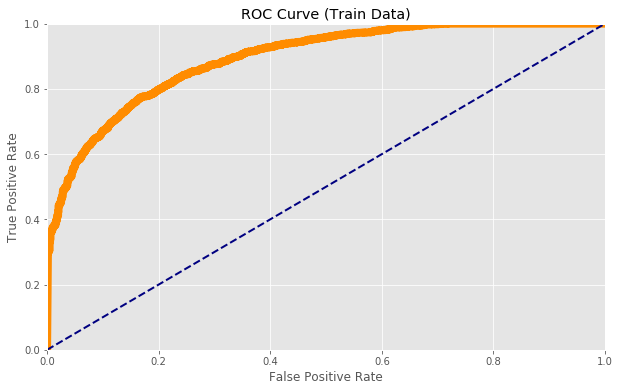

In [16]:
print('Solution 14')
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=10)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [17]:
print('Solution 15')
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

Solution 15


0.8923536722979051

Solution 16


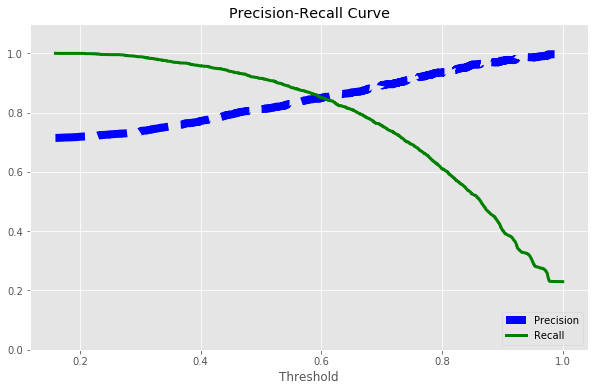

In [18]:
print('Solution 16')
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### optimal threshold is approximately 0.6


In [19]:
print('Solution 17')
# The accuracy of the model
score = knn.score(X_test, y_test)
print("Accuracy: %f" % score)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

Solution 17
Accuracy: 0.794898

No. of correct predictions (Test): 779/980

Confusion Matrix (Test Data):
 [[177 147]
 [ 54 602]]


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)

Precision = 0.803738
Recall = 0.917683
F1 Score = 0.856940


In [21]:
# import classification_report
from sklearn.metrics import classification_report
print('Classification report after dropping alcohol column')
print(classification_report(y_test,y_test_predicted))

Classification report after dropping alcohol column
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       324
           1       0.80      0.92      0.86       656

   micro avg       0.79      0.79      0.79       980
   macro avg       0.78      0.73      0.75       980
weighted avg       0.79      0.79      0.78       980



### Classification report before dropping alcohol column

|precision |   recall | f1-score  | support|
|------|------|------|------|
|   0   |    0.76  |    0.54 |     0.63 |      324|
|    1  |     0.80  |    0.91  |    0.85  |     656|
| micro avg   |    0.79  |    0.79  |    0.79  |     980|
|   macro avg  |     0.78   |   0.73   |   0.74   |    980|
|weighted avg   |    0.79   |   0.79  |    0.78  |     980|

## There is hardly any difference afer dropping the column.